In [1]:
import matplotlib.pyplot as plt
import csv, glob, os

In [2]:
L_indices = [35]

In [3]:
problem_name = 'benchmark'
report_directories = ['../dual_report_L_test', '../primal_report_L_test']

In [4]:
directoriess = [[os.path.join(base_directories, 'VARN_' + str(L_index) + '_steps_9_' + problem_name + '_L_test_LSCHEME') for L_index in L_indices] for base_directories in report_directories]

In [5]:
scheme_dictionaries = [{}, {}]
scheme_iterationss = [{}, {}]
scheme_times = [{}, {}]

In [6]:
for directories, scheme_dictionary in zip(directoriess, scheme_dictionaries):
    for directory, L_index in zip(directories, L_indices):
        print('Reading contents of directory ' + directory)
        files = glob.glob(os.path.join(directory, '*_' + problem_name +'*.csv'))

        print('Pattern ' + os.path.join(directory, '*_' + problem_name +'*.csv') + ' matched with ' + str(len(files)) + ' files')

        scheme_dictionary[str(L_index)] = list()

        for file in files:
            scheme_dictionary[str(L_index)].append( file )
        
        scheme_dictionary[str(L_index)].sort( )

        print('')

Reading contents of directory ../dual_report_L_test\VARN_35_steps_9_benchmark_L_test_LSCHEME
Pattern ../dual_report_L_test\VARN_35_steps_9_benchmark_L_test_LSCHEME\*_benchmark*.csv matched with 9 files

Reading contents of directory ../primal_report_L_test\VARN_35_steps_9_benchmark_L_test_LSCHEME
Pattern ../primal_report_L_test\VARN_35_steps_9_benchmark_L_test_LSCHEME\*_benchmark*.csv matched with 9 files



In [7]:
for scheme_iterations in scheme_iterationss:
    for L_index in L_indices:
        scheme_iterations[str(L_index)] = []

        for file in scheme_dictionary[str(L_index)]:
            with open(file, 'r') as csvfile:
                lines = csv.reader(csvfile, delimiter=',')
                scheme_iterations[str(L_index)].append(sum(1 for row in lines))

                print('File ' + file + ' has ' + str(scheme_iterations[str(L_index)][-1]) + ' iterations!')
        
        print('')

File ../primal_report_L_test\VARN_35_steps_9_benchmark_L_test_LSCHEME\010_benchmark_L_test_LSCHEME_richards_solver.csv has 59 iterations!
File ../primal_report_L_test\VARN_35_steps_9_benchmark_L_test_LSCHEME\020_benchmark_L_test_LSCHEME_richards_solver.csv has 60 iterations!
File ../primal_report_L_test\VARN_35_steps_9_benchmark_L_test_LSCHEME\040_benchmark_L_test_LSCHEME_richards_solver.csv has 62 iterations!
File ../primal_report_L_test\VARN_35_steps_9_benchmark_L_test_LSCHEME\060_benchmark_L_test_LSCHEME_richards_solver.csv has 62 iterations!
File ../primal_report_L_test\VARN_35_steps_9_benchmark_L_test_LSCHEME\080_benchmark_L_test_LSCHEME_richards_solver.csv has 62 iterations!
File ../primal_report_L_test\VARN_35_steps_9_benchmark_L_test_LSCHEME\100_benchmark_L_test_LSCHEME_richards_solver.csv has 62 iterations!
File ../primal_report_L_test\VARN_35_steps_9_benchmark_L_test_LSCHEME\120_benchmark_L_test_LSCHEME_richards_solver.csv has 62 iterations!
File ../primal_report_L_test\VARN_

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


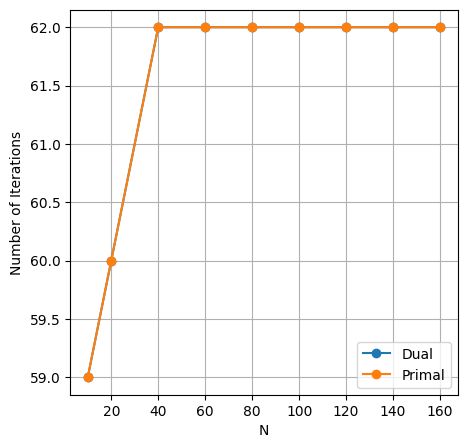

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

for scheme_iterations in scheme_iterationss:
    for L_index, upper_limit in zip(L_indices, [9]):

        ax.plot([10, 20, 40, 60, 80, 100, 120, 140, 160], scheme_iterations[str(L_index)], 'o-')


ax.set_xlabel('N')
ax.set_ylabel('Number of Iterations')
ax.grid()

ax.legend(['Dual', 'Primal'])

plt.savefig('L_scheme_N_comparison.eps', format='eps')